# Individual Coding Exercise (ICE) 4

In this ICE 4, classifier training is covered with binary logistic regression model, decision tree model, Naive Bayes model.

In [1]:
#import necessary packages

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#upload the dataset

mooc = pd.read_csv("ICE4_Data.csv")
mooc

,certified,forum.posts,grade,assignment
0,no,7,3,9
1,no,7,4,1
2,yes,191,8,19
3,yes,130,10,18
4,yes,135,8,18
...,...,...,...,...
995,yes,88,10,13
996,yes,153,10,19
997,no,41,4,3
998,no,47,6,12


In this dataset, there are four variables:

**certified**: whether the student earned the certificate at the end of the MOOC
<br> **forum.posts**: how many posts the student has made throughout the course
<br> **grade**: what grade they earned.
<br> **assignment**: how many optional assignments the student has complemented.

In [3]:
#view the values and counts of the column named 'certified'

mooc['certified'].value_counts()

yes    725
no     275
Name: certified, dtype: int64

In [4]:
#descriptive statistics of the dataset

mooc.describe()

,forum.posts,grade,assignment
count,1000.000000,1000.00000,1000.000000
mean,113.107000,7.76500,13.693000
std,55.126477,2.38232,5.011973
min,1.000000,1.00000,1.000000
25%,72.750000,8.00000,12.000000
50%,118.500000,8.00000,15.000000
75%,160.000000,9.00000,17.000000
max,200.000000,10.00000,20.000000


In [5]:
#installing seaborn package to import it in the next step

import pip
pip.main(['install', 'seaborn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [6]:
#importing seaborn package to plot better graphics

import seaborn as sns

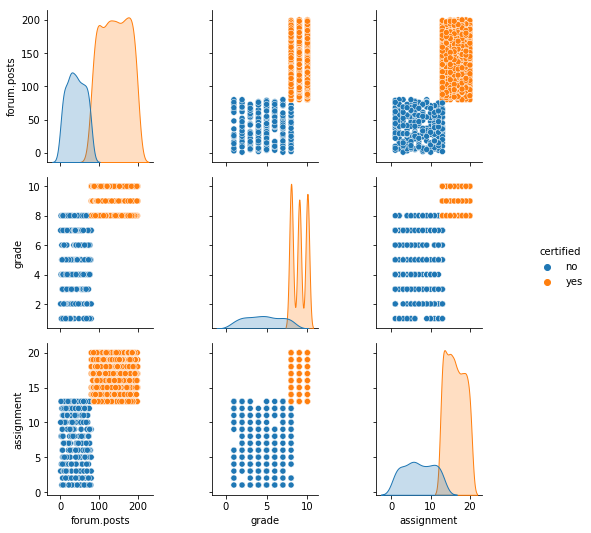

In [7]:
#plotting a graph of certified against the independent variables

sns.pairplot(mooc, hue="certified")

In [8]:
#import LogisticRegression from sklearn.linear_model

from sklearn.linear_model import LogisticRegression

In [9]:
#creating a new column names using prefix = 'certified'

dummy = pd.get_dummies(mooc['certified'], prefix='certified')
dummy

,certified_no,certified_yes
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
995,0,1
996,0,1
997,1,0
998,1,0


In [10]:
#merging and eliminating redundant columns

moocD = pd.concat([mooc, dummy], axis=1)
moocD = moocD.drop(['certified', 'certified_no'], axis=1)
moocD

,forum.posts,grade,assignment,certified_yes
0,7,3,9,0
1,7,4,1,0
2,191,8,19,1
3,130,10,18,1
4,135,8,18,1
...,...,...,...,...
995,88,10,13,1
996,153,10,19,1
997,41,4,3,0
998,47,6,12,0


In [26]:
mooc_dummies = pd.get_dummies(mooc, prefix='certified_recode', columns=['certified'])
mooc_dummies

,forum.posts,grade,assignment,certified_recode_no,certified_recode_yes
0,7,3,9,1,0
1,7,4,1,1,0
2,191,8,19,0,1
3,130,10,18,0,1
4,135,8,18,0,1
...,...,...,...,...,...
995,88,10,13,0,1
996,153,10,19,0,1
997,41,4,3,1,0
998,47,6,12,1,0


In [12]:
#Creating an array of Xs and an array for the training labels -- "certified yes"

Xs = moocD[["forum.posts", "grade", "assignment"]].to_numpy()
certified = moocD.loc[:,"certified_yes"].values.reshape(-1,1)

In [13]:
#loading LogisticRegression() and calling for LogisticRegression.fit()

moocLogitModel1 = LogisticRegression()
moocLogitModel1.fit(Xs, certified)

C:\Users\pooja\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [14]:
#calling intercept 

moocLogitModel1.intercept_

array([-63.13291439])

In [15]:
#calling coefficients of each parameter

moocLogitModel1.coef_

array([[0.62419697, 0.52270711, 0.85766257]])

In [17]:
import statsmodels.api as sm #using sm model from the statsmodels.api package to do the same as above

moocLogitModel2 = sm.Logit(certified, Xs)
moocLogitModel2Fit = moocLogitModel2.fit()
print(moocLogitModel2Fit.summary())

Optimization terminated successfully.
         Current function value: 22.457768
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Sun, 12 Dec 2021   Pseudo R-squ.:                     inf
Time:                        23:32:13   Log-Likelihood:                -22458.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0378      0.003     10.852      0.000       0.031       0.045
x2            -0.3202      0

C:\Users\pooja\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pooja\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pooja\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3500: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


Decision trees learn from data to approximate the training data with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

In [18]:
from sklearn.tree import DecisionTreeClassifier #importing decision tree classifier

Xs_tree = mooc.drop('certified', axis = 1)
certified = mooc['certified']

In [19]:
#initialize the classification tree model and then use the Xs and Y to train the model

moocTreeModel = DecisionTreeClassifier()
moocTreeModel.fit(Xs_tree, certified)

DecisionTreeClassifier()

Once we have the model, we have different ways to see what do we get. First, the text representation can be useful when working on applications whitout user interface or when we want to log information about the model into the text file. 

In [20]:
from sklearn import tree
text_representation = tree.export_text(moocTreeModel)
print(text_representation)

|--- feature_0 <= 79.50
|   |--- class: no
|--- feature_0 >  79.50
|   |--- feature_1 <= 7.50
|   |   |--- class: no
|   |--- feature_1 >  7.50
|   |   |--- class: yes



In [ ]:
 tree.plot_tree(moocTreeModel, feature_names = ["forum.posts", "grade", "assignment"],
               
               class_names = mooc.certified) #more visual than text representation used above

Next is Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.

In [27]:
#importing the necessary package

from sklearn.naive_bayes import GaussianNB 

Xs_NB = mooc.drop("certified", axis = 1)
certified = mooc['certified']

Here we are using predict() to use given Xs to predict the given y. And then use an advance way in Python called list comprehension to obtain whether each element in certified_pred matches the elements in certified. The result returns a list of True or False. We can take the summation of them and divided them by the length of this list to obtain the accuracy because True is viewed as 1 while False is viewed as 0.

In [28]:
#initialize the classification Naive Bayes model

moocNBModel = GaussianNB()
moocNBModel.fit(Xs_NB, certified)

GaussianNB()

In [23]:
certified_pred = moocNBModel.predict(Xs_NB)
performance = [item in certified_pred for item in certified]
print("The accuracy is", sum(performance)/len(performance)*100, '%')

The accuracy is 100.0 %


We now need a sample of data held back from training our model that is used to give an estimate of model performance. This type of data is often called either validation data or test data as opposed to the training data, which was used to train the model.

In [24]:
#Splitting the data

from sklearn.model_selection import train_test_split

#For logistic regression
Xs_logit = moocD[["forum.posts", "grade", "assignment"]].to_numpy()
certified_logit = moocD.loc[:, "certified_yes"].values.reshape(-1,1)
xs_logit_training, xs_logit_test, y_logit_training, y_logit_test = train_test_split(Xs_logit, certified_logit, test_size = 0.2)

#For decision tree and Naive Bayes
Xs_TNB = mooc.drop('certified', axis = 1)
certified_TNB = mooc['certified']
xs_TNB_training, xs_TNB_test, y_TNB_training, y_TNB_test = train_test_split(Xs_TNB, certified_TNB, test_size = 0.2)

In [41]:
#Re-train the model with just the training data
#Logistic regression with sklearn

moocTrainModel1 = LogisticRegression()
moocTrainModel1.fit(Xs_logit, certified_logit)

C:\Users\pooja\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [38]:
moocTrainModel1.intercept_

array([-63.13291439])

In [39]:
moocTrainModel1.coef_

array([[0.62419697, 0.52270711, 0.85766257]])

In [42]:
#Re-train the model with just the training data
#Logistic Regression with statsmodels

moocTrainModel2 = sm.Logit(certified_logit, Xs_logit)
moocTrainModel2Fit = moocTrainModel2.fit()
print(moocTrainModel2Fit.summary())

Optimization terminated successfully.
         Current function value: 22.457768
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                     inf
Time:                        00:56:54   Log-Likelihood:                -22458.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0378      0.003     10.852      0.000       0.031       0.045
x2            -0.3202      0

C:\Users\pooja\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pooja\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pooja\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3500: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [48]:
#Re-train the model with just the training data
#Decision Tree

moocTrainTreeModel = DecisionTreeClassifier()
moocTrainTreeModel.fit(Xs_TNB, certified_TNB)

DecisionTreeClassifier()

In [49]:
Text_rep_2 = tree.export_text(moocTrainTreeModel)
print(Text_rep_2)

|--- feature_0 <= 79.50
|   |--- class: no
|--- feature_0 >  79.50
|   |--- feature_2 <= 11.00
|   |   |--- class: no
|   |--- feature_2 >  11.00
|   |   |--- class: yes



[Text(136.72,187.033,'X[0] <= 79.5\ngini = 0.399\nsamples = 1000\nvalue = [275, 725]'),
 Text(68.36,112.22,'gini = 0.0\nsamples = 271\nvalue = [271, 0]'),
 Text(205.08,112.22,'X[2] <= 11.0\ngini = 0.011\nsamples = 729\nvalue = [4, 725]'),
 Text(136.72,37.4067,'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(273.44,37.4067,'gini = 0.0\nsamples = 725\nvalue = [0, 725]')]

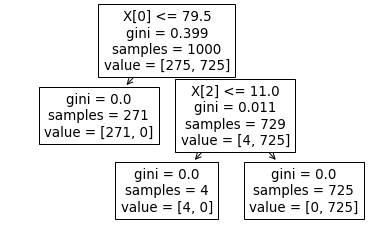

In [50]:
tree.plot_tree(moocTrainTreeModel)

In [53]:
#Re-train the model with just the training data
#Naive Bayes

moocTrainNBModel = GaussianNB()
moocTrainNBModel.fit(Xs_TNB, certified_TNB)

GaussianNB()

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
#sklearn logistic regression model confusion matrix

print(confusion_matrix(y_logit_test, certified_pred_logit1))

[[ 54   0]
 [  0 146]]
